In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/davidspector/Downloads/85300606_20230814_093203_0000_TRUS.nii.gz"

In [3]:
im = nib.load(path, mmap=False)

In [4]:
ar = im.get_fdata()
print(ar.shape)

(992, 440, 1818, 1, 3)


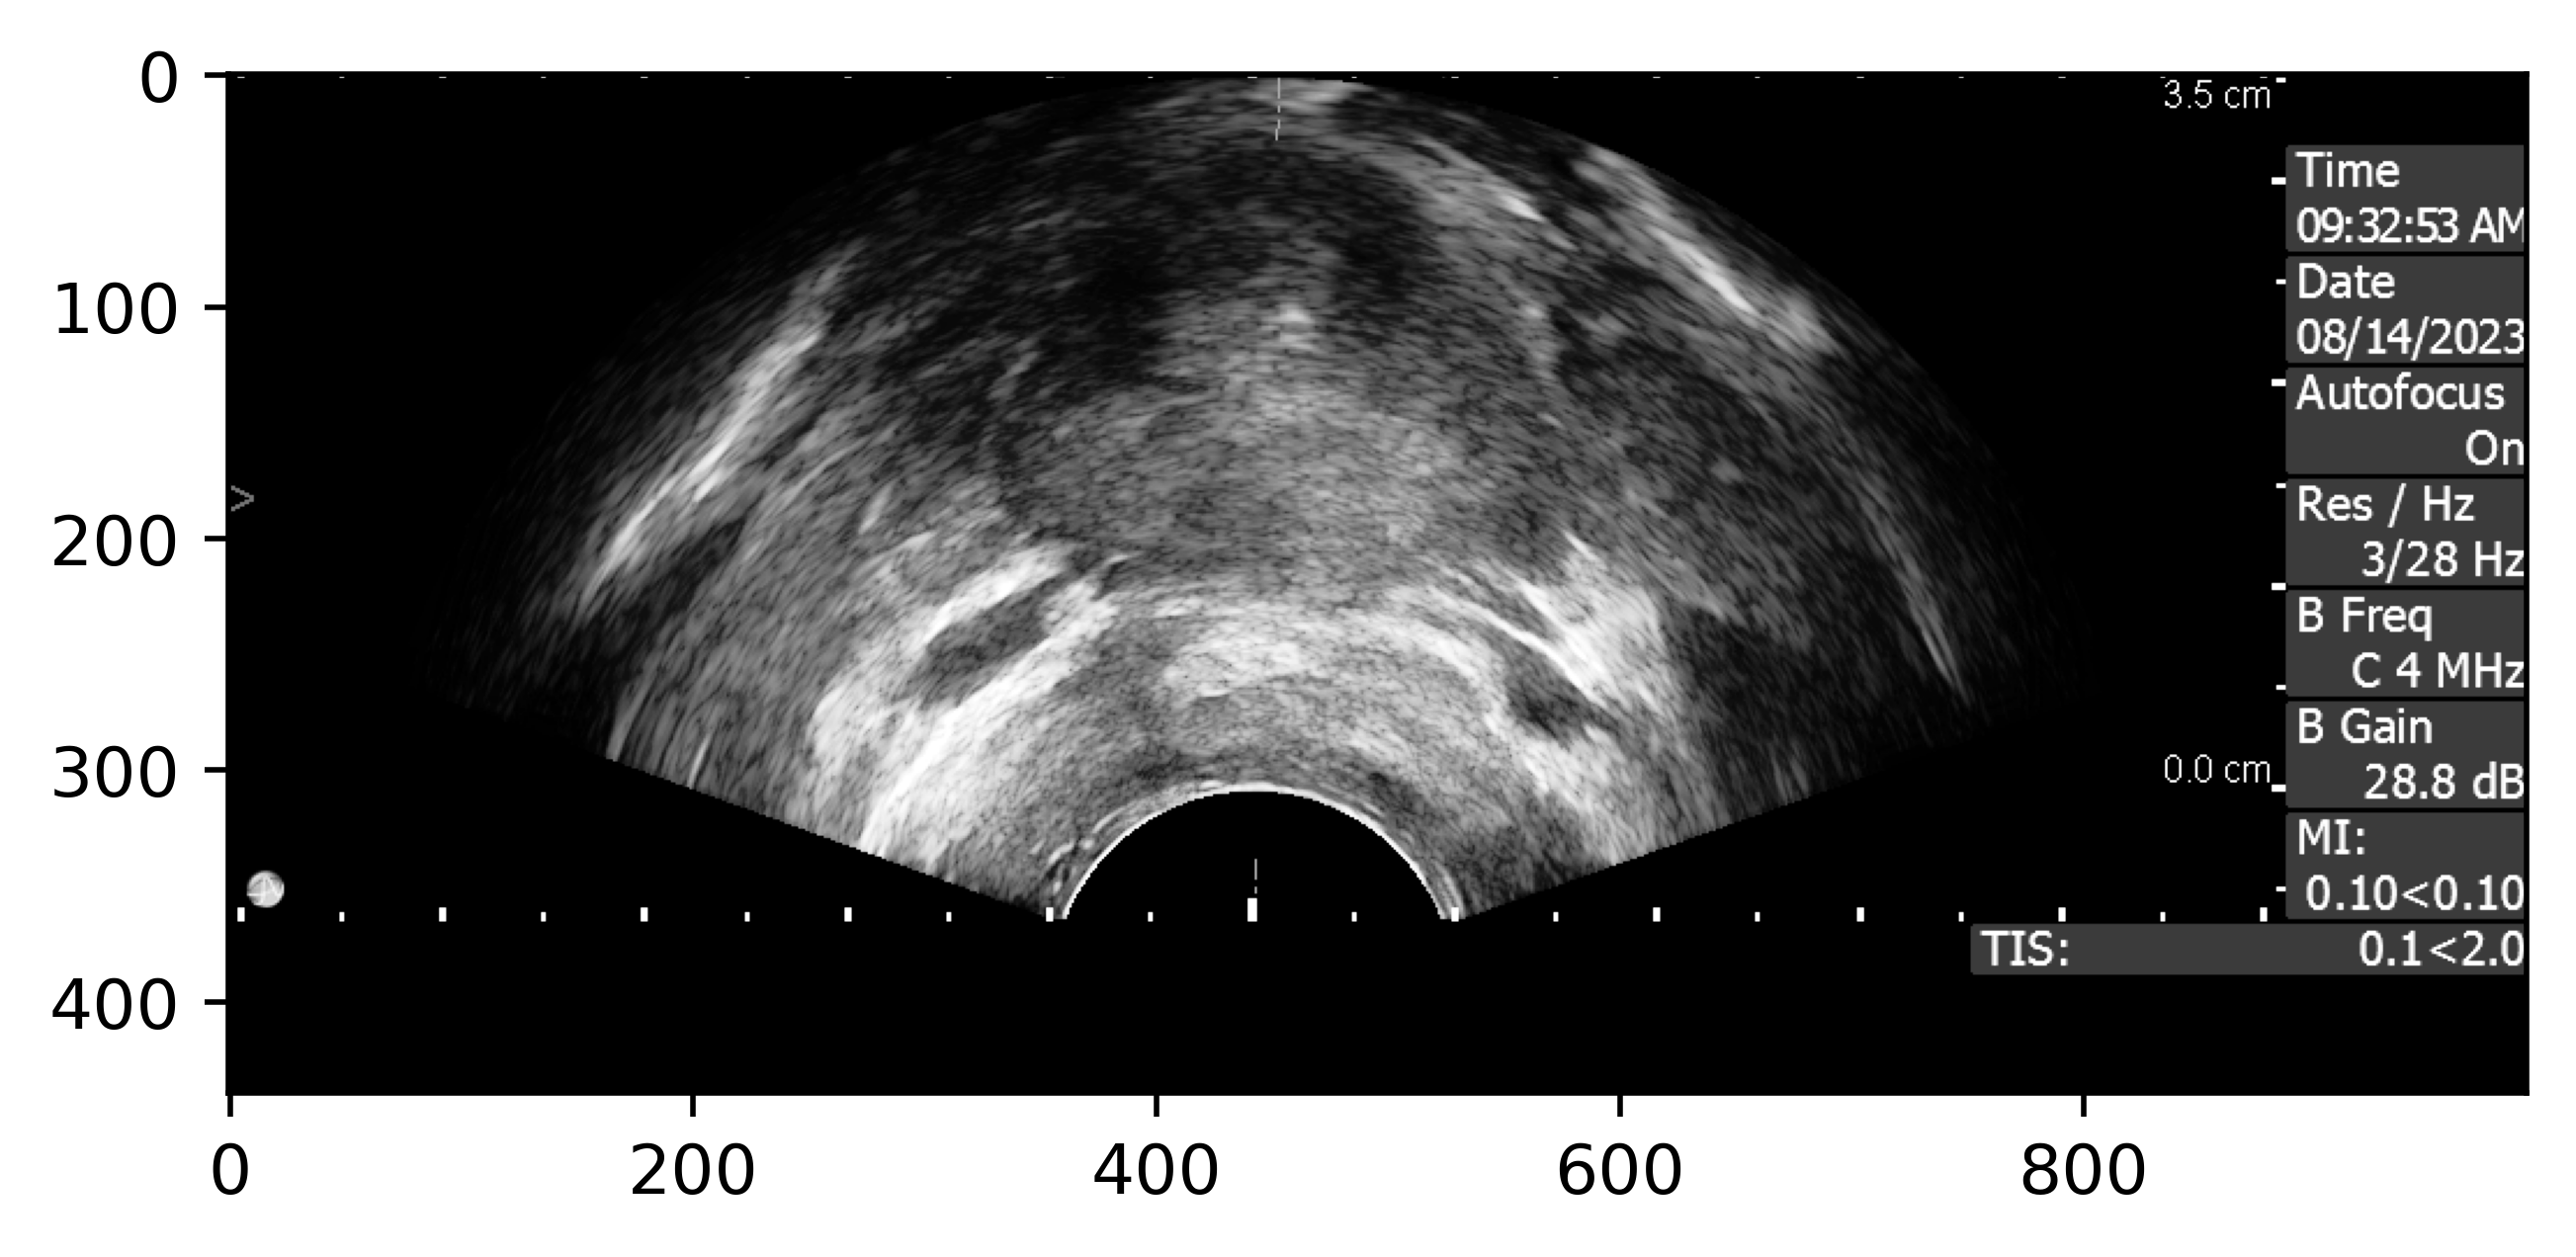

In [18]:
plt.figure(dpi=500)
plt.imshow(np.transpose(ar[:,:,1000,:,0]).reshape((440, 992)).astype(np.uint8), cmap="Greys_r")

In [19]:
new_path = "/Users/davidspector/Downloads/85300606_20230814_093203_0000_CEUS.nii.gz"
new_im = nib.load(new_path, mmap=False)
new_ar = new_im.get_fdata()
print(new_ar.shape)

(992, 360, 1818, 1, 3)


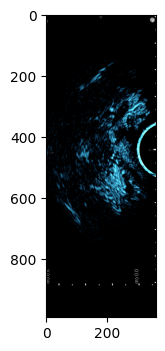

In [24]:
plt.figure(dpi=100)
plt.imshow(new_ar[:,:,1000,:,:].reshape((992, 360, 3)).astype(np.uint8), cmap="Greys_r")

In [31]:
new_ar_org = new_ar.reshape((992, 360, 1818, 3))
av_ar = np.zeros((992, 360, 1818))
for x in range(new_ar.shape[0]):
    for y in range(new_ar.shape[1]):
        for z in range(new_ar.shape[2]):
            av_ar[x,y,z] = (new_ar_org[x,y,z,0]+new_ar_org[x,y,z,1]+new_ar_org[x,y,z,2])/3

KeyboardInterrupt: 

In [33]:
new_ar_org = new_ar.reshape((992, 360, 1818, 3))
hi = np.mean(new_ar_org, axis=3)
print(hi.shape)

(992, 360, 1818)


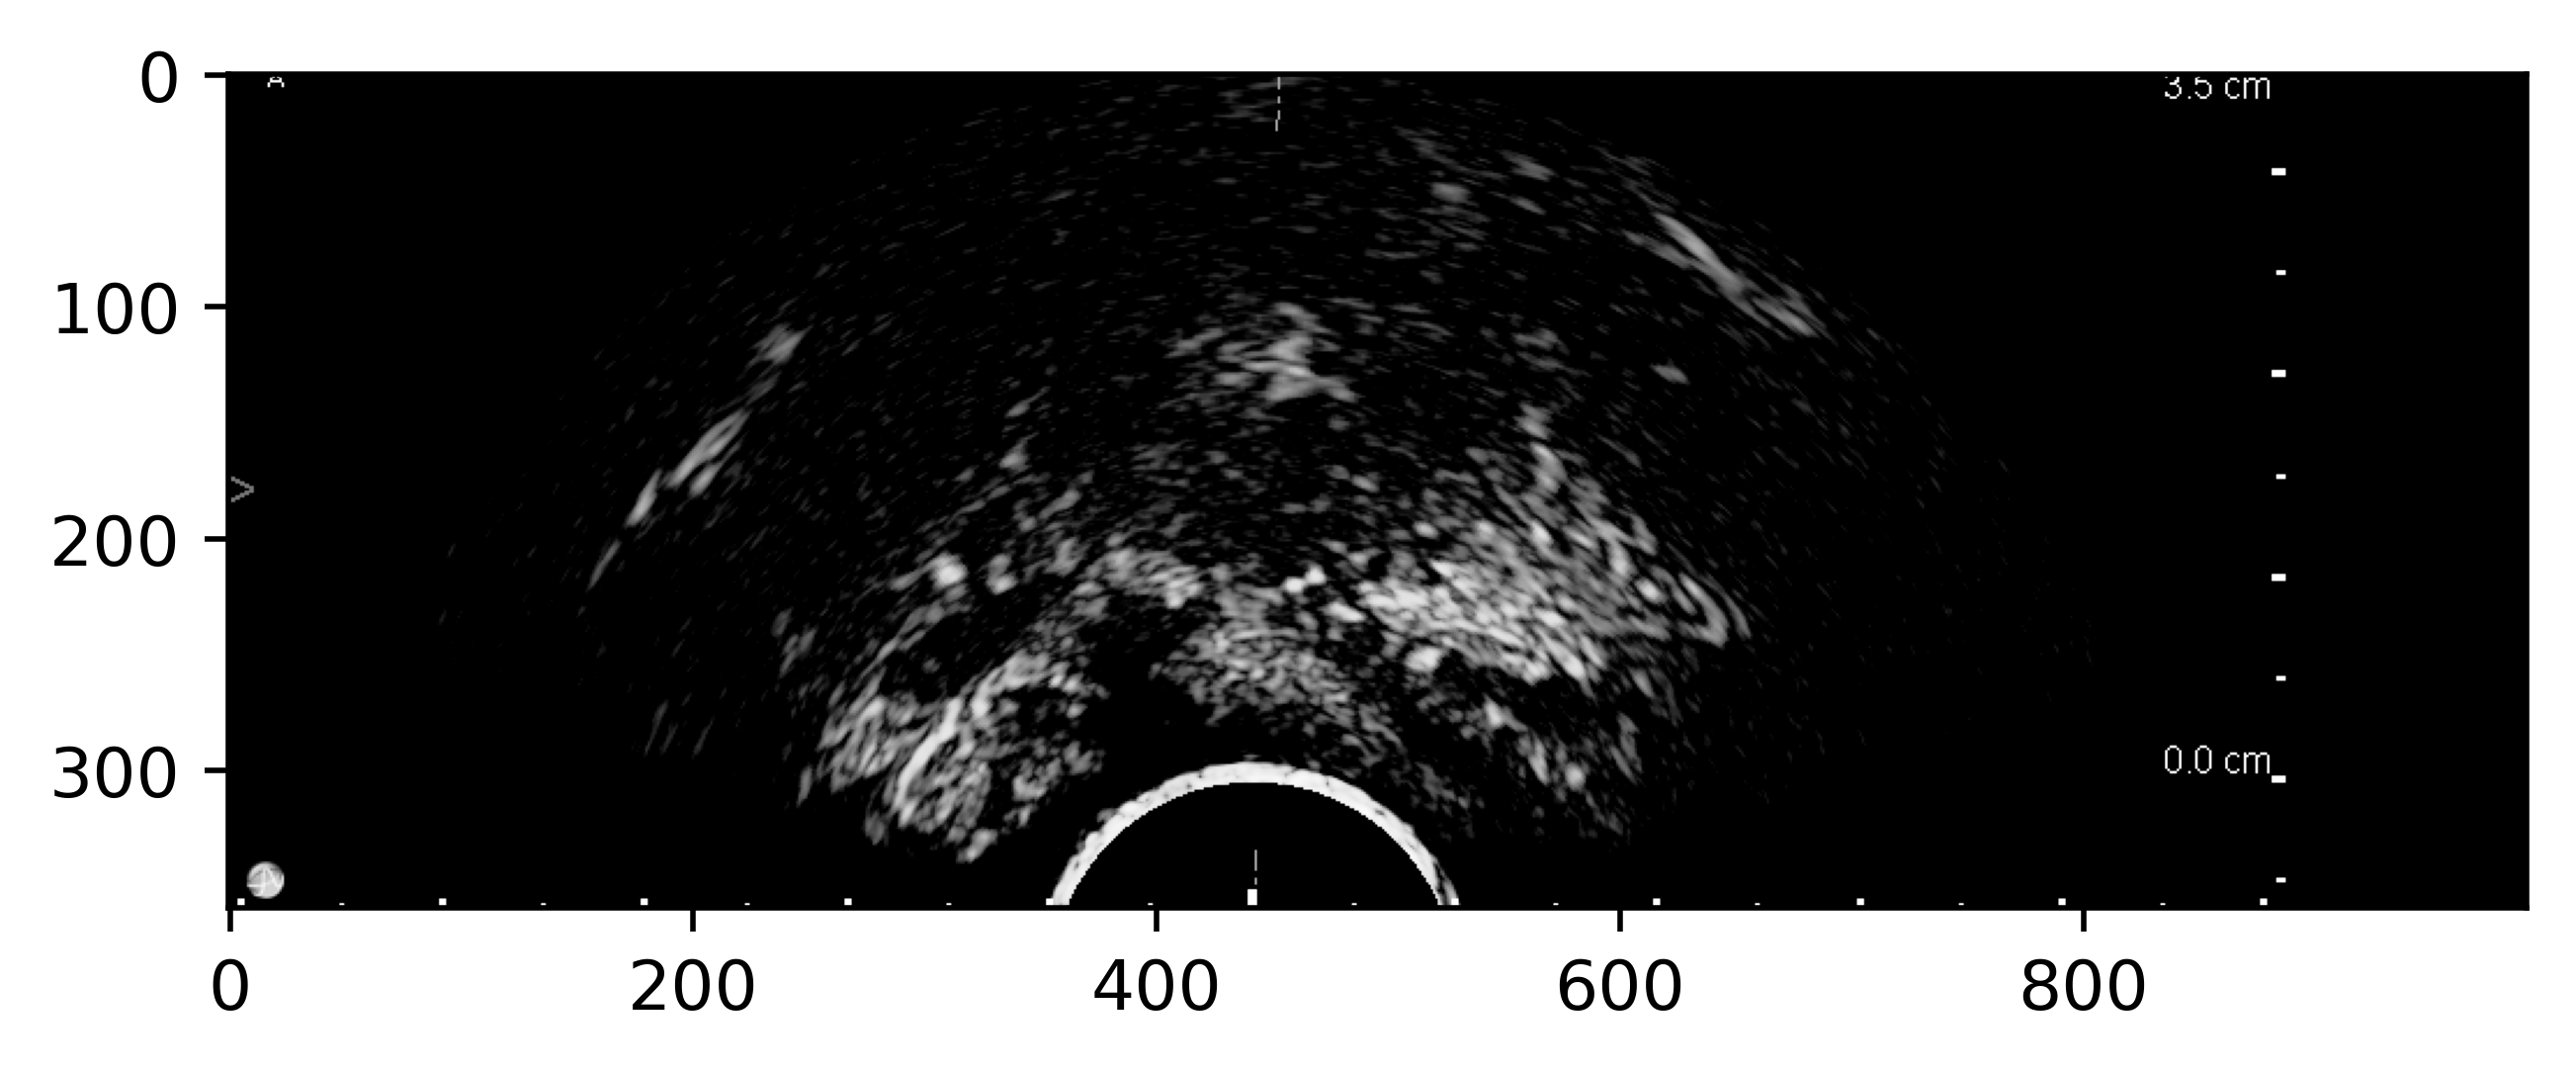

: 

In [39]:
plt.figure(dpi=500)
plt.imshow(np.transpose(hi[:,:,1000]).astype(np.uint8), cmap="Greys_r")